[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/OpenCV.ipynb)

In [2]:
import urllib.request as req
url="http://uta.pw/shodou/img/28/214.png"
req.urlretrieve(url,"test.png")
import cv2
img=cv2.imread("test.png")
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


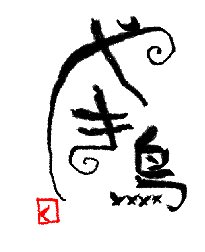

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
img=cv2.imread("test.png")
plt.axis("off")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [1]:
from google.colab import files
uploaded=files.upload()

Saving test.jpg to test.jpg


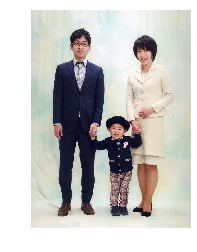

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
img=cv2.imread("test.jpg")
plt.axis("off")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

<function matplotlib.pyplot.show>

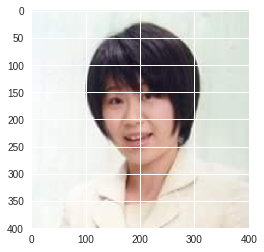

In [17]:
import matplotlib.pyplot as plt
import cv2
img=cv2.imread("test.jpg")
im2=img[100:300, 400:600]
im2=cv2.resize(im2,(400,400))
cv2.imwrite("arita.jpg",im2)
plt.imshow(cv2.cvtColor(im2,cv2.COLOR_BGR2RGB))
plt.show

In [19]:
from google.colab import files
uploaded=files.upload()

Saving haarcascade_frontalface_alt.xml to haarcascade_frontalface_alt.xml


= 103 103 177 177


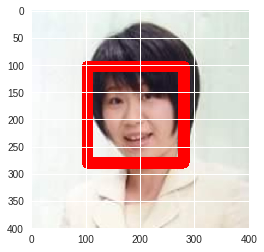

In [23]:
import matplotlib.pyplot as plt
import cv2
cascade_file="haarcascade_frontalface_alt.xml"
cascade=cv2.CascadeClassifier(cascade_file)
img=cv2.imread("arita.jpg")
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
face_list=cascade.detectMultiScale(img_gray,minSize=(150,150))
if len(face_list)==0:
  print("missed")
  quit()
for (x,y,w,h) in face_list:
  print("=",x,y,w,h)
  red=(0,0,255)
  cv2.rectangle(img,(x,y),(x+w,y+h),red,thickness=20)
cv2.imwrite("face-detect.jpg",img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()

---0---
---10---
---20---
---30---
---40---
---50---
---60---
---70---
---80---


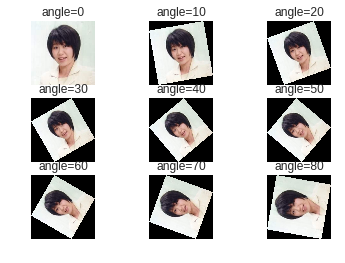

In [24]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("arita.jpg")
def face_detect(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
  for (x,y,w,h) in face_list:
    print("顔の座標=", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=30)
for i in range(0,9):
  ang=i*10
  print("---"+str(ang)+"---")
  img_r=ndimage.rotate(img,ang)
  face_detect(img_r)
  plt.subplot(3,3,i+1)
  plt.axis("off")
  plt.title("angle="+str(ang))
  plt.imshow(cv2.cvtColor(img_r,cv2.COLOR_BGR2RGB))
plt.show()  



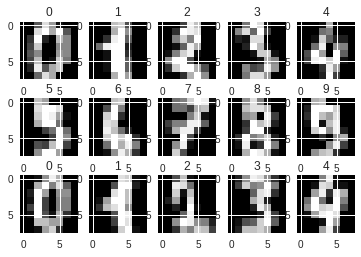

In [27]:
from matplotlib import pyplot as plt
from sklearn import datasets
digits=datasets.load_digits()
for i in range(15):
  plt.subplot(3,5,i+1)
  
  plt.title(digits.target[i])
  plt.imshow(digits.images[i],cmap="gray")
plt.show()  

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score


digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1, 64)) 


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


clf = svm.LinearSVC()
clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

from sklearn.externals import joblib
joblib.dump(clf,'digits.pkl')

0.95


['digits.pkl']

In [34]:
from google.colab import files
uploaded=files.upload()

Saving flower.jpg to flower.jpg


14 237 65 27
16 28 159 186
152 1 46 42
0 0 200 300


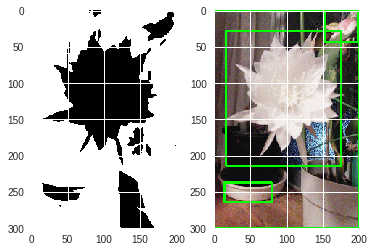

In [37]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("flower.jpg")
img=cv2.resize(img,(200,300))
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.GaussianBlur(gray,(7,7),0)
im2=cv2.threshold(gray,140,240,cv2.THRESH_BINARY_INV)[1]
plt.subplot(1,2,1)
plt.imshow(im2,cmap="gray")
cnts=cv2.findContours(im2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[1]
for pt in cnts:
  x,y,w,h=cv2.boundingRect(pt)
  if w<30 or w>200:continue
  print(x,y,w,h)
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.jpg",dpi=200)
plt.show()


In [38]:
from google.colab import files
uploaded=files.upload()

Saving letter01.png to letter01.png


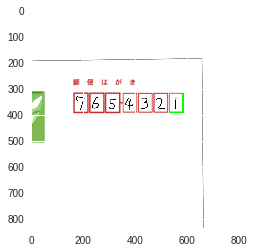

In [39]:
import cv2
import matplotlib.pyplot as plt

def detect_zipno(fname):
  img = cv2.imread(fname)
  h, w = img.shape[:2]
  img = img[0:h//2, w//3:]
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray, (3, 3), 0) 
  im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
  cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[1]
  result = []
  for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    if not(50 < w < 70): continue
    result.append([x, y, w, h])
    
    result = sorted(result, key=lambda x: x[0])
    
    result2 = []
    lastx = -100
    for x, y, w, h in result:
      if (x - lastx) < 10: continue
      result2.append([x, y, w, h])
      lastx = x
    
    for x, y, w, h in result2:
      cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    return result2, img

if __name__ == '__main__':
  cnts, img = detect_zipno("letter01.png")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.savefig("detect-zip.png", dpi=200)
  plt.show()



In [41]:
from google.colab import files
uploaded=files.upload()

Saving detect_zip.py to detect_zip.py


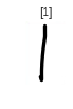

In [42]:
from detect_zip import *
import matplotlib.pyplot as plt

from sklearn.externals import joblib

clf = joblib.load("digits.pkl")

cnts, img = detect_zipno("letter01.png")

for i, pt in enumerate(cnts):
  x, y, w, h = pt
  x += 8
  y += 8
  w -= 16
  h -= 16
  im2 = img[y:y+h, x:x+w]
  im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
  im2gray = cv2.resize(im2gray, (8, 8)) 
  im2gray = 15 - im2gray // 16
  im2gray = im2gray.reshape((-1, 64))
  res = clf.predict(im2gray)
  plt.subplot(1, 7, i + 1)
  plt.imshow(im2)
  plt.axis("off")
  plt.title(res)

plt.show()
